In [131]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [132]:
an_full = prepare_data("data_npy/41_dd.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/41.npy", 0, 0, chop=False)

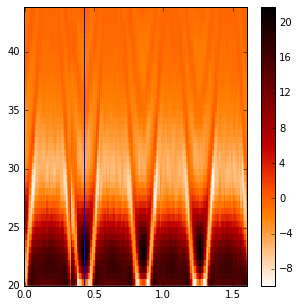

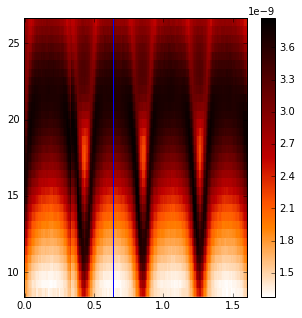

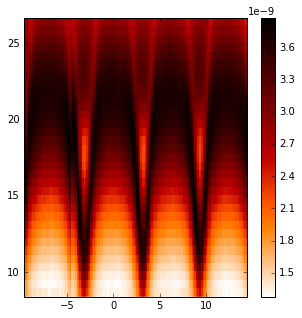

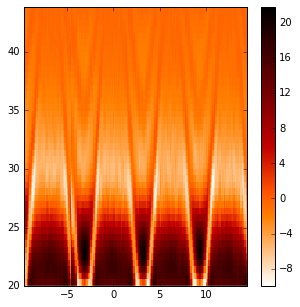

In [142]:
lc = prepare_data("data_npy/41.npy", 7, 40, chop=True)
an = prepare_data("data_npy/41_dd.npy", 7, 50, chop=True)
a, b = calibration_phase_axis(an, lc, 40, 50, 60, 75, plot=True)
plot_datascan(lc)
plot_datascan(an)

In [143]:
an2 = prepare_data("data_npy/41_dd.npy", 22, 45, chop=True)
an2['y'] -= b
an2['y'] /= a
an2['y'] *= 2*np.pi

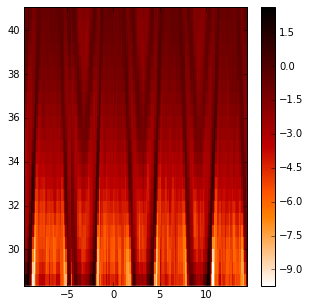

In [144]:
plot_datascan(an2)

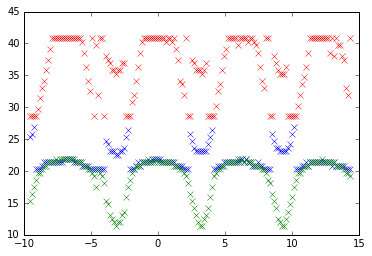

In [145]:
lc_line = peak_positions(lc)
abs_line = peak_positions(an)
abs_line2 = peak_positions(an2)
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(an['y'], abs_line, 'x')
plt.plot(lc['y'], lc_line, 'x')
plt.plot(an2['y'], abs_line2, 'x')

In [146]:
lc_line = zip(lc['y'][34:], lc_line[34:])
abs_line = zip(np.concatenate((an['y'][38:50], an['y'][80:91], an['y'][121:132])),
               np.concatenate((abs_line[38:50], abs_line[80:91], abs_line[121:132])))
abs_line2 = zip(np.concatenate((an2['y'][48:56], an2['y'][73:77], an2['y'][91:98], an2['y'][111:117], an2['y'][134:140])),
               np.concatenate((abs_line2[48:56], abs_line2[73:77], abs_line2[91:98], abs_line2[111:117], abs_line2[134:140])))

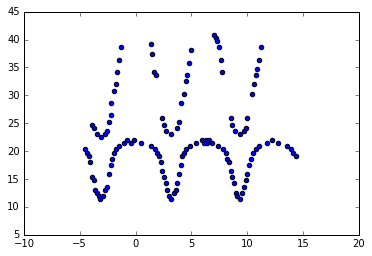

In [147]:
lines = merge_points([lc_line, abs_line, abs_line2])
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Fit with one free parameter

In [177]:
%%capture
p0 = [0.8]
fit_1 = fit_abs_model(lines, 79, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [178]:
fit_1['popt']

array([ 0.93702294])

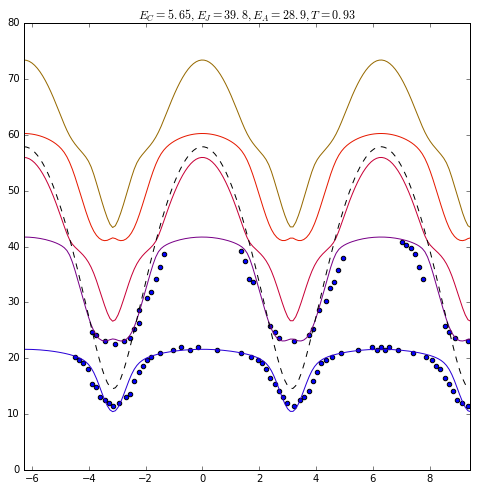

In [179]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, Ea=28.95, flux_final=4*np.pi, n_fluxes=200)

## Fit with two free parameters

In [180]:
%%capture
p0 = [15, 0.87]
fit_2 = fit_abs_model(lines, 79, p0, Ej=39.8, Ec=5.65)

In [181]:
fit_2['popt']

array([ 25.10189301,   0.90567174])

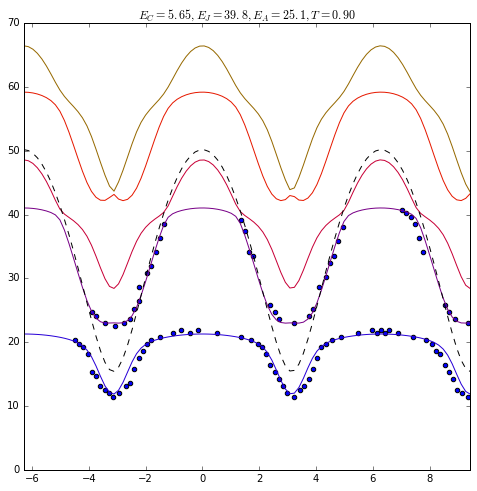

In [182]:
plot_fit_results(fit_2, lines, Ej=39.8, Ec=5.65)

## Fit with three free parameters

In [183]:
%%capture
p0 = [5, 27, 0.9]
fit_3 = fit_abs_model(lines, 79, p0, Ej=39.8)

In [184]:
fit_3['popt']

array([  5.52700459,  25.21640004,   0.90507648])

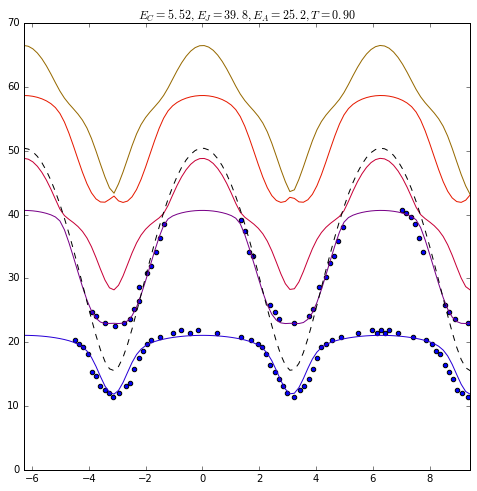

In [185]:
plot_fit_results(fit_3, lines, Ej=39.8)

## Fit with four free parameters

In [186]:
%%capture
p0 = [5, 40, 27, 0.9]
fit_4 = fit_abs_model(lines, 79, p0, max_tol=2e-6)

In [187]:
fit_4['popt']

array([  7.75303073,  29.7022011 ,  26.02648293,   0.90020655])

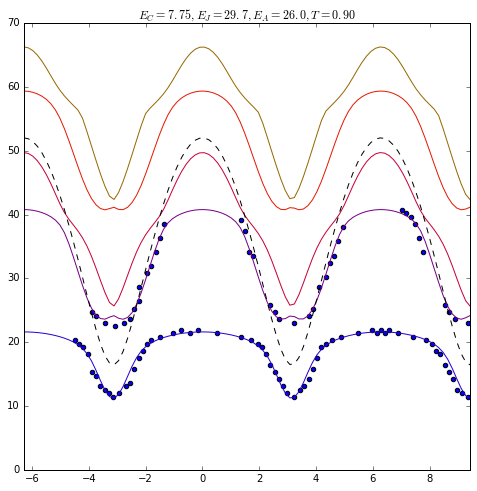

In [188]:
plot_fit_results(fit_4, lines)